In [95]:
import keras
import numpy as np
from   scipy.stats  import normaltest
from   sklearn.base import BaseEstimator
from   sklearn.model_selection import train_test_split
from   sklearn.metrics         import *
from   sklearn.datasets        import make_classification

### Inicialização de Glorol 

In [83]:
fan_in  = 3 # numero de neuronios da camanda de entrada
fan_out = 2 # numero de neuronios da camanda de saida

In [84]:
from typing import Literal
class Inicializate(BaseEstimator):
    def __init__(self, fan_in:int, fan_out:int, activation:Literal['relu','selu','glorot']='relu'):
        self.fan_in  = fan_in
        self.fan_out = fan_out
        self.activation = activation

    def normal(self, size=1):
        match (self.activation):
            case 'relu':
                return np.random.normal(loc=0, scale=2/self.fan_in, size=size)
            case 'selu':
                return np.random.normal(loc=0, scale=1/self.fan_in, size=size)
            case 'glorot':
                return np.random.normal(loc=0, scale=1/np.average([self.fan_in,self.fan_out]), size=size)


In [85]:
ini = Inicializate(fan_in=2, fan_out=2, activation='glorot')
display(ini)
ini.normal(2).reshape(2,1)

Inicializate(activation='glorot', fan_in=2, fan_out=2)

array([[ 0.63170134],
       [-0.68758161]])

In [86]:
int = keras.initializers.VarianceScaling(scale=1, distribution='normal', mode='fan_avg')
int(shape=(2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 0.34101304],
       [-1.0620738 ]], dtype=float32)>

## Funções de ativação sem saturação

In [87]:
X, y = make_classification(random_state=42, n_samples=3000, n_clusters_per_class=2, class_sep=0.75)

xtrainF, xtestF, ytrainF, ytestF = train_test_split(X, y, random_state=42 ,test_size=0.25)

xtrain, xvalid , ytrain , yvalid = train_test_split(xtrainF, ytrainF, random_state=42, test_size=0.25)

In [88]:
def Model(activation='relu'):
    input_ = keras.layers.Input(shape=xtrain.shape[1:], name='camada entrada')
    hidden_1 = keras.layers.Dense(units=15, activation=activation, name='camada_inferior')(input_)
    hidden_2 = keras.layers.Dense(units=10, activation=activation, name='camada_media')(hidden_1)
    hidden_3 = keras.layers.Dense(units=5,  activation=activation, name='camada_superior')(hidden_2)
    output_  = keras.layers.Dense(units=1,  activation=activation, name='saida')(hidden_3)
    return keras.models.Model( inputs=[input_], outputs=[output_] )


In [103]:
model1 = Model('relu')
model1.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.binary_crossentropy,
    metrics   = [keras.metrics.binary_accuracy]
)
#earlyStopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history1 = model1.fit(xtrain, ytrain, epochs=10 ,batch_size=10, validation_data=(xvalid,yvalid), verbose=0)

In [102]:
model2 = Model('elu')
model2.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.binary_crossentropy,
    metrics   = [keras.metrics.binary_accuracy]
)
#earlyStopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history2 = model2.fit(xtrain, ytrain, epochs=10 ,batch_size=10, validation_data=(xvalid,yvalid),verbose=0)

In [104]:
model3 = Model('selu')
model3.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.binary_crossentropy,
    metrics   = [keras.metrics.binary_accuracy]
)
#earlyStopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history3 = model3.fit(xtrain, ytrain, epochs=10 ,batch_size=10, validation_data=(xvalid,yvalid),verbose=0)

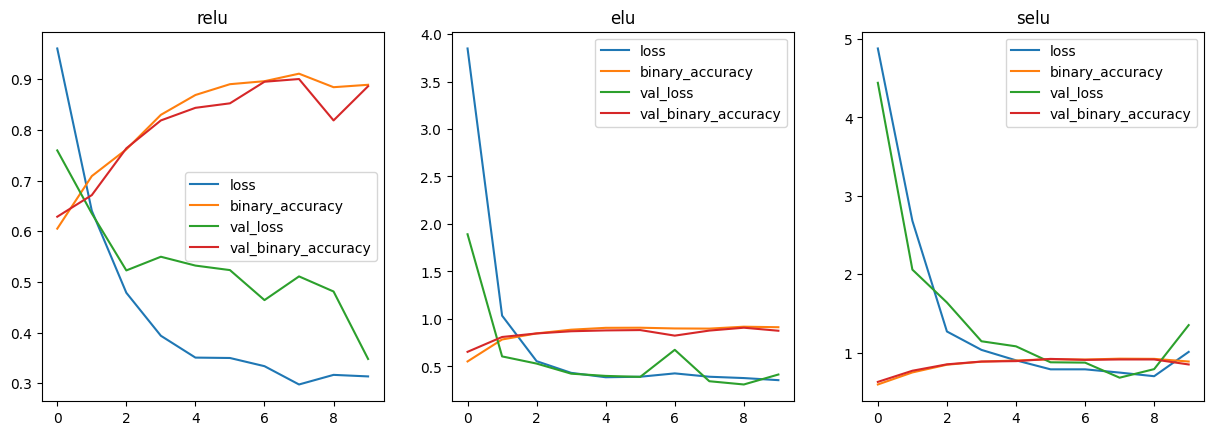

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,3)
fig.set_figwidth(15)
pd.DataFrame(history1.history).plot(ax=ax[0],title='relu')
pd.DataFrame(history2.history).plot(ax=ax[1],title='elu')
pd.DataFrame(history3.history).plot(ax=ax[2],title='selu')

plt.show()

In [96]:
print(classification_report(ytestF,model1.predict(xtestF)>0.5))

24/24 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       371
           1       0.90      0.92      0.91       379

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750



In [97]:
print(classification_report(ytestF,model2.predict(xtestF)>0.5))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       371
           1       0.91      0.94      0.92       379

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750



In [108]:
print(classification_report(ytestF,model3.predict(xtestF)>0.5))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       371
           1       0.90      0.77      0.83       379

    accuracy                           0.84       750
   macro avg       0.85      0.84      0.84       750
weighted avg       0.85      0.84      0.84       750



In [101]:
confusion_matrix(ytestF,model2.predict(xtestF)>0.5)

24/24 [==============================] - 0s 1ms/step


array([[335,  36],
       [ 24, 355]])